<a href="https://colab.research.google.com/github/kibbm/ML-Tensorflow/blob/master/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94_%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%85%B8%EC%9D%B4%EC%A6%88%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

신경망 교과서 /

## 5장 **오토인코더를 사용한 이미지 노이즈 제거**

https://github.com/PacktPublishing/Neural-Network-Projects-with-Python/tree/master/Chapter05


- https://github.com/PacktPublishing/Neural-Network-Projects-with-Python/blob/master/Chapter05/basic_autoencoder_denoise_MNIST.py


5.5 MNIST 데이터 셋

In [1]:
from keras.datasets import mnist

training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set



11493376/11490434 [==============================] - 0s 0us/step


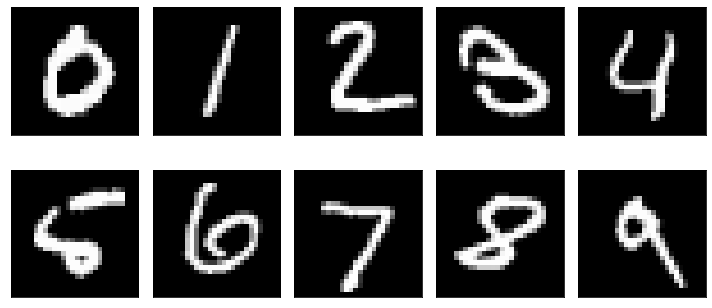

In [2]:
#데이터에 어떤 숫자가 그려졌는지 확인해 보자. 

from matplotlib import pyplot as plt
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, aax9, ax10)) = plt.subplots(2, 5, figsize=(10, 5))

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, aax9, ax10]):
  for i in range(1000):
    if y_test[i] == idx:
      ax.imshow(X_test[i], cmap='gray')
      ax.grid(False)
      ax.set_xticks([])
      ax.set_yticks([])
      break

plt.tight_layout()
plt.show()      

5.6 기본 오토인코더

은닉 레이어의 크기는 다음 2가지가 균형을 이루는 값으로 정하는게 좋다. 


*   입력의 특징을 압축해 표현할 수 있을 정도로 충분히 작아야 한다. 
*   디코더가 큰 손실 없이 입력을 복원할 수 있을 정도로 충분히 커야 한다. 



5.6.1. 케라스로 오토 인코더 만들기

In [3]:
from keras.models import Sequential
from keras.layers import Dense

# 기본 오토인코더 만들기. 객체 생성.
model = Sequential()

#은닉 레이어(Dense)를 모델에 추가. ... 케라스에서는 Dense레이어를 생성할 때 units매개변수를 지정해 은닉 레이어의 크기를 정의할 수 있음.
hidden_layer_size = 1  #노드 1개짜리 은닉 레이어를 모델에 추가. 
model.add(Dense(units=hidden_layer_size, input_shape=(784, ), activation='relu')) #원본 이미지는 28*28=784(레이어 크기)

model.add(Dense(units=784, activation='sigmoid')) #유닛 784개 가진 출력 Dense레이어를 추가./ 출력값이 0~1로 제한되므로 시그모이드 활성화 함수 사용.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [10]:
#모델 생성 과정 전체를 한번에 실행하는 함수를 생성하자. 

def create_basic_autoencoder(hidden_layer_size):
  model = Sequential()
  model.add(Dense(units=hidden_layer_size, input_shape=(784, ), activation='relu'))
  model.add(Dense(units=784, activation='sigmoid'))
  return model

model = create_basic_autoencoder(hidden_layer_size=1)



In [11]:
# 벡터 형태를 가로 784, 세로 1로 변경하는 코드.
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

#벡터 값을 0과 1 사이로 정규화 하는 코드
X_train_reshaped = X_train_reshaped/255
X_test_reshaped = X_test_reshaped/255

#모델을 컴파일
model.compile(optimizer = 'adam', loss='mean_squared_error')

#모델 훈련
model.fit(X_train_reshaped, X_train_reshaped, epochs = 10)  # 오류.....

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0752
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0625
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0617
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0614


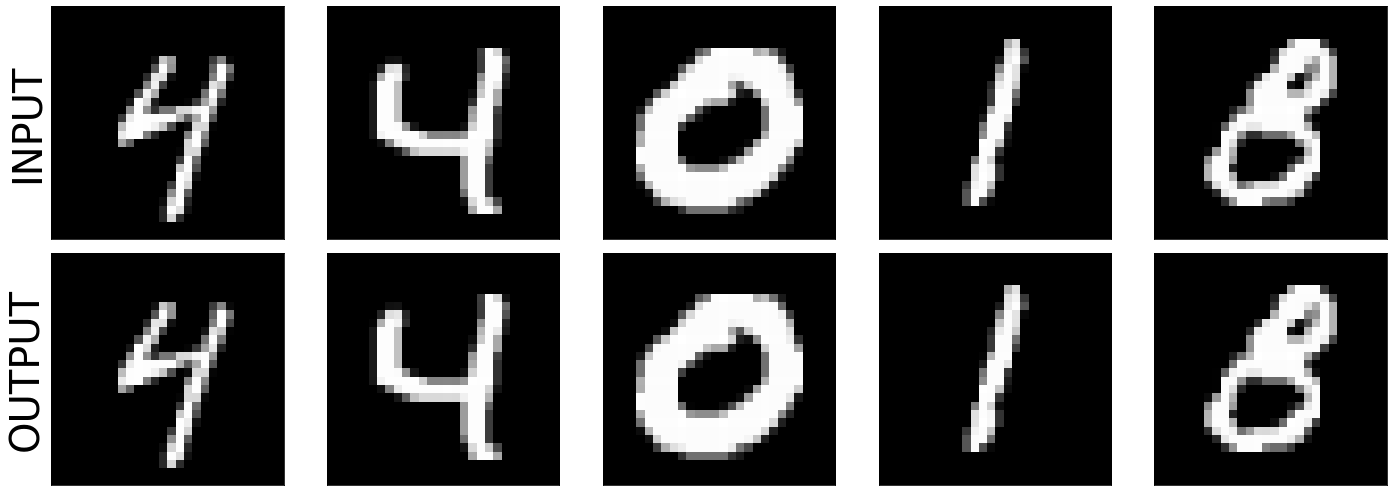

In [18]:
#모델 훈련을 마치면 테스트 데이터셋에 적용하자.
output = model.predict(X_test_reshaped)

#결과 이미지를 화면에 나타내서 원본과 얼마나 비슷한지 확인하기...이상적인 오토인코더는 원본 이미지에 가까운 결과를 출력해야 함.

#테스트 이미지 중 5개를 무작위로 골라 1번째 줄에 그리고, 해당 입력 이미지의 출력이미지를 바로 아래에 그린다. 
import random
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20, 7))

#이미지 5개를 무작위로 고른다. 
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

#원본(입력) 이미지를 맨 위에 그린다.
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
  ax.imshow(X_test[randomly_selected_imgs[i]], cmap='gray')
  if  i == 0:
    ax.set_ylabel("INPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])

#오토 인코더가 출력한 이미지를 아래에 그린다.
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
  ax.imshow(X_test[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
  if  i == 0:
    ax.set_ylabel("OUTPUT", size=40)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])  


plt.tight_layout()
plt.show()

5.6.2 은닉 레이어 크기가 오토인코더 성능에 미치는 영향
- 은닉레이어 크기를 2배씩 늘려가며 오토인코더를 여러개 만들고 각 모델의 성능을 살펴보자. 

In [19]:
# 은닉레이어 크기를 2배씩 늘려가며 오토인코더를 여러개 만들기...앞서 정의한 헬퍼함수를 사용해 노드2개, 4, 8, 16, 32개짜리 모델을 만든 것.
hiddenLayerSize_2_model = create_basic_autoencoder(hidden_layer_size = 2)
hiddenLayerSize_4_model = create_basic_autoencoder(hidden_layer_size = 4)
hiddenLayerSize_8_model = create_basic_autoencoder(hidden_layer_size = 8)
hiddenLayerSize_16_model = create_basic_autoencoder(hidden_layer_size = 16)
hiddenLayerSize_32_model = create_basic_autoencoder(hidden_layer_size = 32)

#모델 5개를 한꺼번에 훈련 시킬 수 있다. ... fit()함수에 verbose=0인자를 전달하면 훈련과정을 출력하지 않는다. 
hiddenLayerSize_2_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_2_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_4_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_4_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_8_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_8_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_16_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_16_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_32_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_32_model.fit(X_train_reshaped, X_train_reshaped, epochs=10, verbose=0)



In [20]:
#훈련이 끝나면 모델을 테스트 데이터셋에 적용
output_2_model = hiddenLayerSize_2_model.predict(X_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(X_test_reshaped)

output_8_model = hiddenLayerSize_8_model.predict(X_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(X_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(X_test_reshaped)


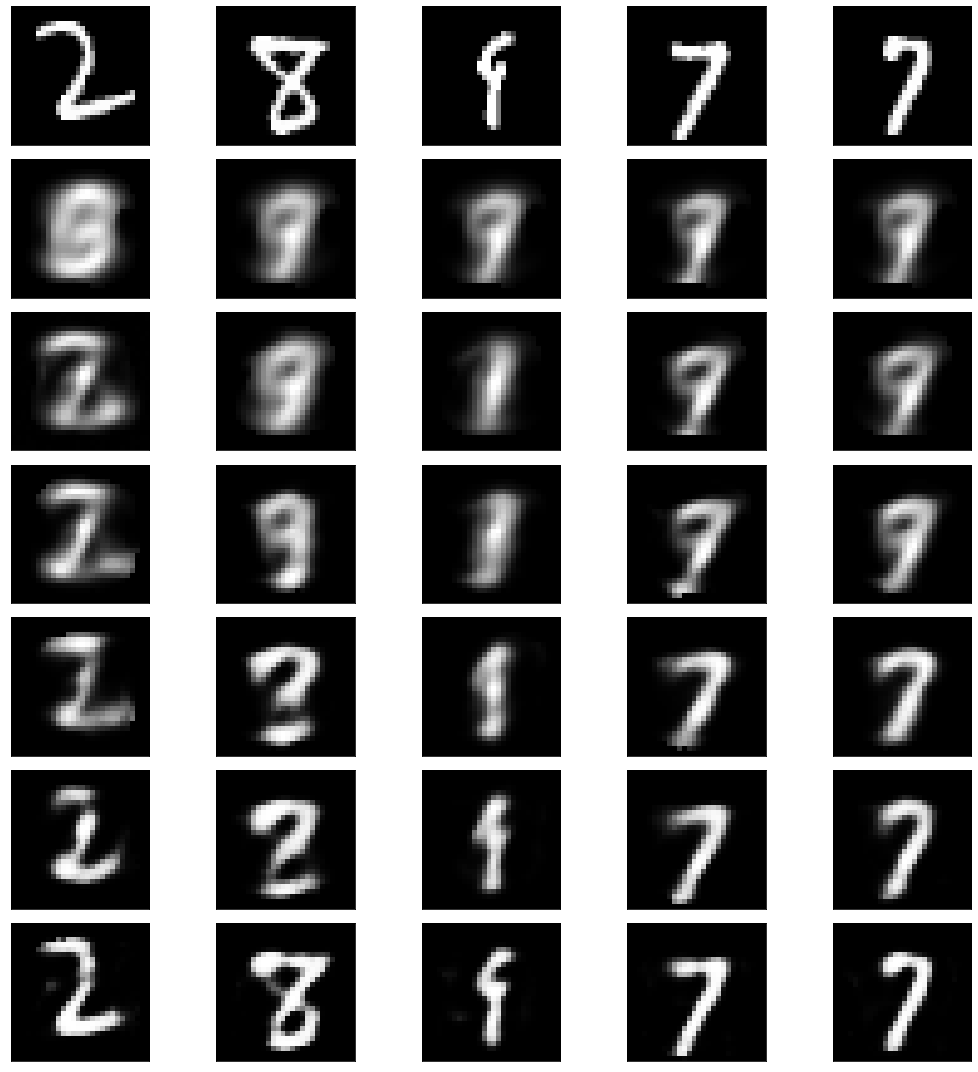

In [22]:
#이제 이미지 5개를 무작위로 골라 각 모델에 입력한 결과&원본 이미지 비교
fig, axes = plt.subplots(7, 5, figsize=(15, 15))

randomly_selected_imgs = random.sample(range(output.shape[0]), 5)
outputs = [X_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

for row_num, row in enumerate(axes):
  for col_num, ax in enumerate(row):
    ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28, 28), cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()    

#결과...은닉 레이어 크기가 2배로 증가할 수록 출력 이미지가 선명해지고 원본 이미지에 가까워지는 것을 볼 수 있다. 압축률 또한 상당히 인상적이다. 
